In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import nltk 
from nltk import NaiveBayesClassifier
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re
import string 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for filenames in os.listdir('D:/ML Projects/NLP/US airlines Twitter Sentiment'):
    print(filenames)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

database.sqlite
Tweets.csv


## Loading data in pandas dataframe

In [2]:
df = pd.read_csv('D:/ML Projects/NLP/US airlines Twitter Sentiment/Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
print(df.shape)

(14640, 15)


# Data visualization 
## Plotting bar graph for null entries 

In [4]:
# Fetching null entries for each column in variable null_entries_each_col and column name
columns = df.columns 
null_entries_each_col = list(df.isnull().sum())

Text(0.5, 1.0, 'Null entries for each column')

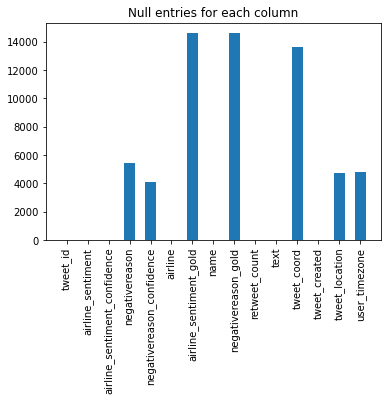

In [5]:
plt.bar(columns, null_entries_each_col, width = 0.5)
plt.xticks(rotation = 90)
plt.title("Null entries for each column")

## Counting count for each sentiment 

Total number of each sentiment
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


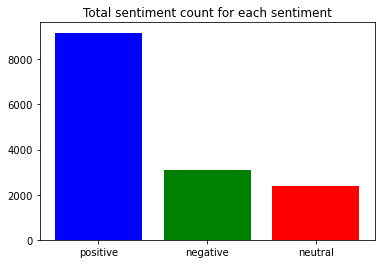

In [6]:
print("Total number of each sentiment")
print(df.airline_sentiment.value_counts())
sentiment_list = list(df.airline_sentiment.value_counts().values) 
sentiments = list(set(df.airline_sentiment))
plt.bar(sentiments,sentiment_list, color=["blue","green","red"])
plt.title("Total sentiment count for each sentiment")
plt.show()

## Sentiment count on the bases of each airline 

Total sentiment per airline
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


Text(0.5, 1.0, 'Name vs sentiment ')

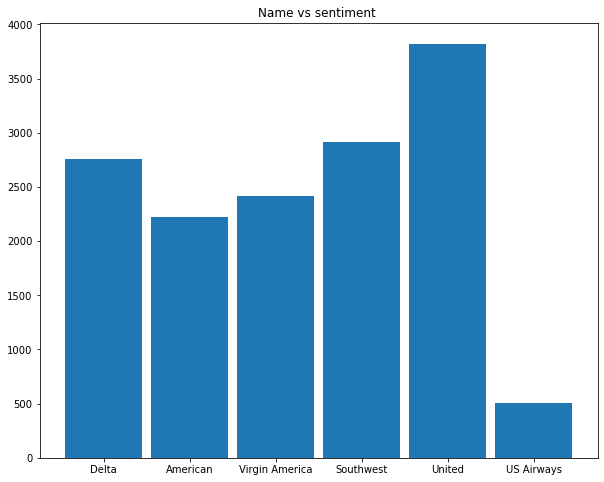

In [7]:
print("Total sentiment per airline")
print(df.groupby('airline')['airline_sentiment'].count())
airline_name = list(set(df['airline']))
airline_sentiment_count = list(df.groupby('airline')['airline_sentiment'].count())

plt.figure(figsize = (10, 8))
plt.bar(airline_name,airline_sentiment_count,0.9)
plt.title("Name vs sentiment ")


In [8]:
print(df.groupby('airline')['airline_sentiment'].value_counts())
count_per_airline = df.groupby('airline')['airline_sentiment'].value_counts()

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64


----------------------------
['Delta', 'American', 'Virgin America', 'Southwest', 'United', 'US Airways']
[955, 1960, 181, 1186, 2633, 2263]
[723, 463, 171, 664, 697, 381]
[544, 336, 152, 570, 492, 269]
----------------------------


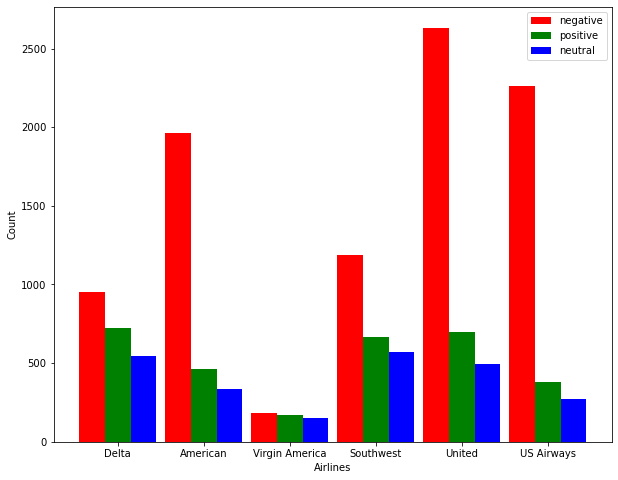

In [9]:
positive = []
negative = []
neutral = []



for airline in airline_name:
    negative.append(count_per_airline[airline]["negative"])
    positive.append(count_per_airline[airline]["neutral"])
    neutral.append(count_per_airline[airline]["positive"])
    
    
print("----------------------------")    
print(airline_name)
print(negative)
print(positive)
print(neutral)
print("----------------------------")

w = 0.3
bar1 = np.arange(len(airline_name))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.figure(figsize = (10, 8))
plt.bar(bar1, negative, width = w, label="negative",color = "red")
plt.bar(bar2, positive,width = w, label="positive", color = "green")
plt.bar(bar3, neutral,width = w, label="neutral", color = "blue")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.xticks(bar1+w,airline_name)
plt.legend()
plt.show()



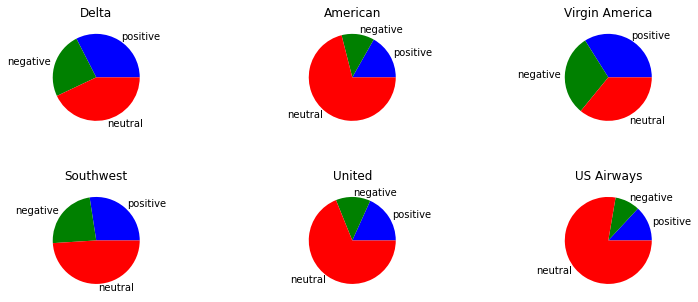

In [10]:
plt.figure(2, figsize = (13,5))
for i in airline_name:
    index = airline_name.index(i)
    plt.subplot(2,3, index+1)
    plt.subplots_adjust(hspace=0.5)
    
    data = [count_per_airline[i]["neutral"],count_per_airline[i]["positive"],count_per_airline[i]["negative"]]
    plt.pie(data, labels = sentiments,colors = ["blue","green","red"])
    plt.title(i)

## Reason for negative tweets 

Reasons for negative tweets
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

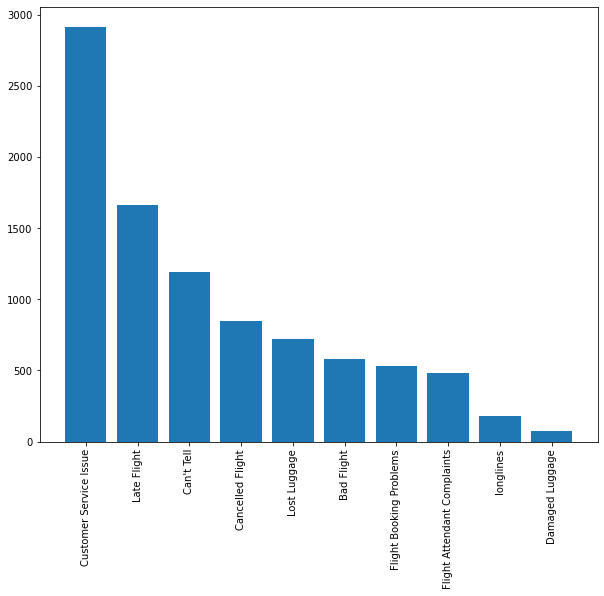

In [11]:
#Overall count for negative tweets 
print("Reasons for negative tweets")
print(df.negativereason.value_counts())

reasons_for_negative = list(df.negativereason.value_counts().keys())
count_for_negative = list(df.negativereason.value_counts().values)
#print(reasons_for_negative)
#print(count_for_negative)
plt.figure(figsize = (10, 8))
plt.bar(reasons_for_negative,count_for_negative)
plt.xticks(rotation = 90)

airline         negativereason             
American        Customer Service Issue         768
                Late Flight                    249
                Cancelled Flight               246
                Can't Tell                     198
                Lost Luggage                   149
                Flight Booking Problems        130
                Bad Flight                      87
                Flight Attendant Complaints     87
                longlines                       34
                Damaged Luggage                 12
Delta           Late Flight                    269
                Customer Service Issue         199
                Can't Tell                     186
                Bad Flight                      64
                Flight Attendant Complaints     60
                Lost Luggage                    57
                Cancelled Flight                51
                Flight Booking Problems         44
                longlines             

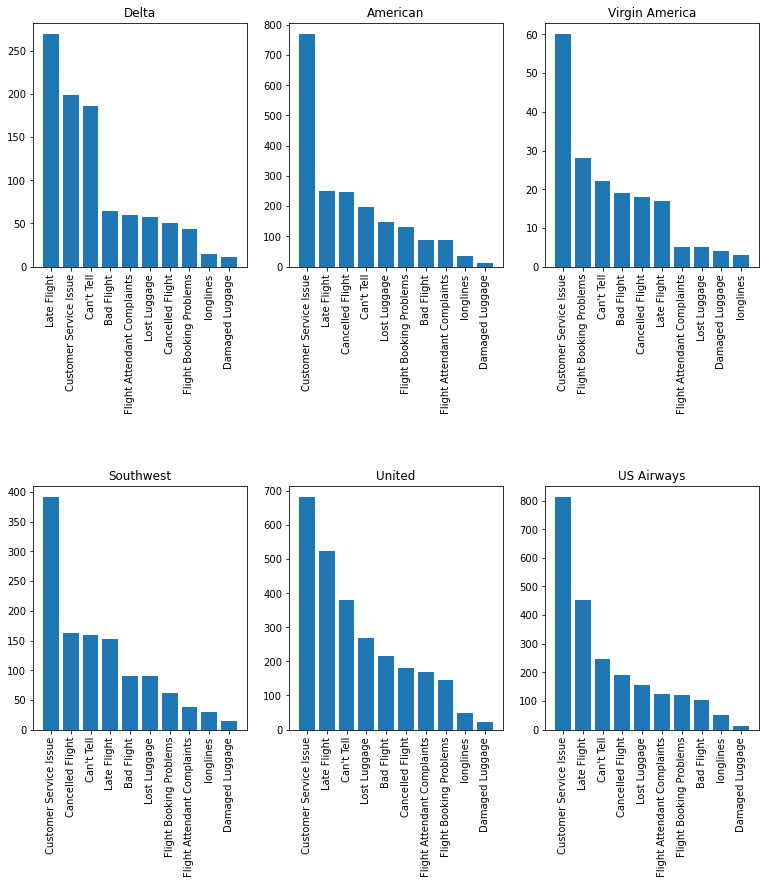

In [12]:
# Airline wise count for negative tweets 
print(df.groupby('airline')['negativereason'].value_counts())
negative_reason_airline = df.groupby('airline')['negativereason'].value_counts()
print("**************************************************")
print("PLOT FOR INDIVIDUAL AIRLINE")
plt.figure(2,figsize = (13,13))
for airline in airline_name:
    index = airline_name.index(airline)
    plt.subplot(2,3,index+1)
    plt.subplots_adjust(hspace = 0.9)
    
    individual_negative = negative_reason_airline[airline]
    x_values = list(individual_negative.keys())
    y_values = list(individual_negative.values)
    plt.bar(x_values, y_values,label = airline )
    plt.xticks(rotation = 90)
    plt.title(airline)

# Text Cleaning and preprocessing 

In [13]:
def convert_sentiment(x):
    if x["airline_sentiment"] == 'positive':
        return 0
    elif x["airline_sentiment"] == 'negative':
        return 1
    elif x["airline_sentiment"] == 'neutral':
        return 2

print("BEFORE")
df.airline_sentiment[0:10]

BEFORE


0     neutral
1    positive
2     neutral
3    negative
4    negative
5    negative
6    positive
7     neutral
8    positive
9    positive
Name: airline_sentiment, dtype: object

In [14]:
df["airline_sentiment"] = df.apply(convert_sentiment,axis = 1)
print("AFTER")
df.airline_sentiment[0:10] 

AFTER


0    2
1    0
2    2
3    1
4    1
5    1
6    0
7    2
8    0
9    0
Name: airline_sentiment, dtype: int64

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w530\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
# This cell of code is taken from the community of kaggle 
def remove_stopwords_punct(row):
    stop_words = stopwords.words('english')
    punctuation = list(string.punctuation)
    stop = stop_words+punctuation  
    
    text = ' '.join([word for word in row.split() if word.lower() not in stop])
    return text

def remove_url_username(row):
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'',row)
    text = re.sub('@[^\s]+','',text)
    return text

def remove_html(row):
    return re.sub(r'<.*?>',r'',row)

def remove_emoji(row):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        

    return emoji_pattern.sub(r'', row)

    
def decontraction(row):
    row = re.sub(r"won\'t", " will not", row)
    row = re.sub(r"won\'t've", " will not have", row)
    row = re.sub(r"can\'t", " can not", row)
    row = re.sub(r"don\'t", " do not", row)
    
    row = re.sub(r"can\'t've", " can not have", row)
    row = re.sub(r"ma\'am", " madam", row)
    row = re.sub(r"let\'s", " let us", row)
    row = re.sub(r"ain\'t", " am not", row)
    row = re.sub(r"shan\'t", " shall not", row)
    row = re.sub(r"sha\n't", " shall not", row)
    row = re.sub(r"o\'clock", " of the clock", row)
    row = re.sub(r"y\'all", " you all", row)
    row = re.sub(r"n\'t", " not", row)
    row = re.sub(r"n\'t've", " not have", row)
    row = re.sub(r"\'re", " are", row)
    row = re.sub(r"\'s", " is", row)
    row = re.sub(r"\'d", " would", row)
    row = re.sub(r"\'d've", " would have", row)
    row = re.sub(r"\'ll", " will", row)
    row = re.sub(r"\'ll've", " will have", row)
    row = re.sub(r"\'t", " not", row)
    row = re.sub(r"\'ve", " have", row)
    row = re.sub(r"\'m", " am", row)
    row = re.sub(r"\'re", " are", row)
    return row

def seperate_alphanumeric(row):
    words = row
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(row):
    tchr = row.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, row):
    substitute = re.sub(r'(\w)\1+', rep, row)
    return substitute

def char(row):
    substitute = re.sub(r'[^a-zA-Z]',' ',row)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_url_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords_punct(x))


In [24]:
df['final_text']


0                                                     said
1                  plus added commercials experience tacky
2                   today Must mean need take another trip
3        Bad Flight really aggressive blast obnoxious e...
4                             Ca Tell really big bad thing
                               ...                        
14635                   thank got different flight Chicago
14636    Customer Service Issue leaving minutes Late Fl...
14637            Please bring American Airlines BlackBerry
14638    Customer Service Issue money change flight ans...
14639    ppl need know many seats next flight Plz put u...
Name: final_text, Length: 14640, dtype: object

## Using NLTK preprocessing kit 


In [29]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\w530\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [34]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\w530\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [35]:
document = []
for row, catagory in zip(df.final_text, df.airline_sentiment):
    document.append((row.split(),catagory))
    

In [36]:
lemmatizer = WordNetLemmatizer()
def get_simple_pos(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [37]:
def clean_review(words):
    output_words = []
    for w in words:
       
        pos = pos_tag([w])
        clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1]))
        output_words.append(clean_word.lower())
    return output_words

In [38]:
document = [(clean_review(document), category) for document, category in document]

In [39]:
import random
random.shuffle(document)
document[0:5]

[(['ca',
   'tell',
   'crew',
   'best',
   'could',
   'control',
   'get',
   'one',
   'chance',
   'honeymoon',
   'amp',
   'fail',
   'miserably'],
  1),
 (['customer',
   'service',
   'issue',
   'hey',
   'tried',
   'call',
   'customer',
   'service',
   'told',
   'hour',
   'wait',
   'past',
   'hour',
   'thanks',
   'suck'],
  1),
 (['customer',
   'service',
   'issue',
   'yes',
   'could',
   'explain',
   'hour',
   'minute',
   'hold',
   'time'],
  1),
 (['great',
   'flight',
   'yesterday',
   'msy',
   'aus',
   'thank',
   'great',
   'safety',
   'service',
   'beautiful',
   'sky'],
  0),
 (['customer', 'service', 'issue', 'still', 'cricket', 'customer', 'service'],
  1)]

# Splitting data, extracting features and Applying classifiers from nltk and sklearn 

## In the trailing lines I'll use nltk classifier to train the data and hence the data is designed on the base of the requirenment of nltk classifier.

In [40]:
 
print(len(document))

14640


In [41]:
#Splitting for train and test 
training_data = document[:13000]
testing_data = document[13000:]

In [42]:
#Extracting features
words = []
for data in training_data:
    words += data[0]
    
freq = nltk.FreqDist(words)
common = freq.most_common(3000)
features = [i[0] for i in common]


In [43]:
#creating feature dictionary 
def feature_dictionary(row):
    feature_dict = {}
    words = set(row)
    for w in features:
        feature_dict[w] = w in words
    return feature_dict 

In [44]:
training_data = [(feature_dictionary(doc), catagory) for doc, catagory in training_data]
testing_data =  [(feature_dictionary(doc), catagory) for doc, catagory in testing_data] 

In [45]:
#training_data[0]

In [46]:
classifier = NaiveBayesClassifier.train(training_data)
nltk.classify.accuracy(classifier,testing_data)

0.8884146341463415

In [47]:
classifier.show_most_informative_features(15)

Most Informative Features
                    lost = True                1 : 2      =    146.6 : 1.0
                   issue = True                1 : 2      =     47.1 : 1.0
                     bad = True                1 : 2      =     37.0 : 1.0
                    tell = True                1 : 0      =     36.8 : 1.0
                favorite = True                0 : 1      =     36.8 : 1.0
                passbook = True                0 : 1      =     36.8 : 1.0
                  street = True                2 : 1      =     36.4 : 1.0
                   kudos = True                0 : 1      =     35.8 : 1.0
                 amazing = True                0 : 1      =     31.7 : 1.0
                 luggage = True                1 : 0      =     30.6 : 1.0
                 helpful = True                0 : 2      =     30.6 : 1.0
                customer = True                1 : 2      =     30.4 : 1.0
                      ca = True                1 : 2      =     29.9 : 1.0

## Running sklearn classifier on the training_data that I've designed for nltk classifier using nltk dummy over sklearn classifier 

In [48]:
#Importing necessary modules 
from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier

In [49]:
svc = SVC()
classifier_sklearn = SklearnClassifier(svc)

In [50]:
classifier_sklearn.train(training_data)

<SklearnClassifier(SVC())>

In [51]:
nltk.classify.accuracy(classifier_sklearn,testing_data)

0.9243902439024391

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier_sklearn_rfc = SklearnClassifier(rfc)
classifier_sklearn_rfc.train(training_data)
nltk.classify.accuracy(classifier_sklearn_rfc,testing_data)

0.9115853658536586

## In the trailing lines I'll use sklearn classifier to train the data and hence the data is designed on the base of the requirenment of sklearn classifier.

In [53]:
categories = [category for document, category in document]
documents = [" ".join(document) for document, category in document]

In [54]:
x_train, x_test, y_train, y_test = train_test_split(documents, categories,test_size = 0.10)

In [55]:
count_vec = CountVectorizer(max_features = 2500,ngram_range = (1,2))
x_train = count_vec.fit_transform(x_train)
x_test = count_vec.transform(x_test)

In [56]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [57]:
svc.score(x_test, y_test)

0.9262295081967213

### Desicion Tree

In [58]:
ds = DecisionTreeClassifier()
ds.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
ds_prediction =  ds.predict(x_test)

In [60]:
accuracy_score(ds_prediction,y_test)

0.8941256830601093

### Random Forest 

In [61]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
rf_prediction =  rf.predict(x_test)

In [64]:
accuracy_score(rf_prediction,y_test)

0.9282786885245902